In [302]:

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [303]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [304]:
db=pd.read_csv(r'/gdrive/My Drive/Colab Notebooks/trends1.csv',parse_dates=['date'], index_col='date')
print(db.shape)  
db.head()

(261, 4)


,Unnamed: 0,top 1,top 2,top 3
date,,,,
2012-10-07,0,4,14,14
2012-10-14,1,7,15,18
2012-10-21,2,5,12,15
2012-10-28,3,5,15,12
2012-11-04,4,4,12,12


In [305]:
del db[db.columns[0]]


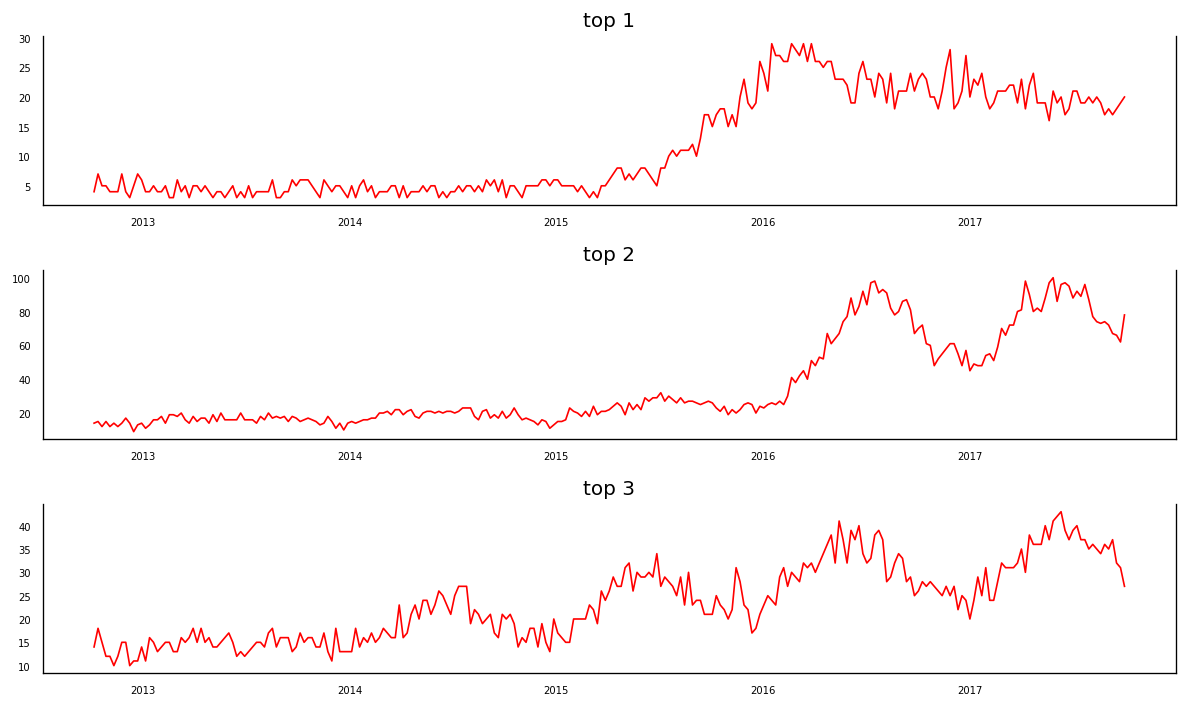

In [306]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = db[db.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(db.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


Observation:

1. Top 2 has the high popularity index. 

In [307]:
db1=pd.read_csv(r'/gdrive/My Drive/Colab Notebooks/trends1.csv')


In [308]:
db1

,Unnamed: 0,top 1,top 2,top 3,date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04
...,...,...,...,...,...
256,256,18,72,35,2017-09-03
257,257,17,67,37,2017-09-10
258,258,18,66,32,2017-09-17
259,259,19,62,31,2017-09-24


In [309]:
db1["date"] = pd.to_datetime(db1["date"])
#db1.groupby(db1.date.dt.year)

In [310]:
db1

,Unnamed: 0,top 1,top 2,top 3,date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04
...,...,...,...,...,...
256,256,18,72,35,2017-09-03
257,257,17,67,37,2017-09-10
258,258,18,66,32,2017-09-17
259,259,19,62,31,2017-09-24


In [311]:
del db1[db1.columns[0]]


In [312]:
db1 = db1.set_index('date')
db1.index.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='date', length=261)

In [313]:
new_db=db1.groupby([(db1.index.year),(db1.index.month)]).sum()



In [314]:
new_db=new_db.tail(13)

In [315]:
new_db

top 1  top 2  top 3
date date                     
2016 10      110    311    136
     11       92    226    103
     12       85    221     98
2017 1       109    244    129
     2        79    235    108
     3        84    290    125
     4       106    431    175
     5        75    365    154
     6        74    374    161
     7       100    452    188
     8        75    298    141
     9        72    267    135
     10       20     78     27

In [316]:
from pandas.core.frame import DataFrame
class Last_12m():

    def __init__(self, df):
       global score
       self.df = df
       self.dictionary=[]

    def last_12m(self,df):
       
            new_db.reset_index(drop=True, inplace=True)

            for ind, column in enumerate(new_db.columns):
    
              perf_increment=((new_db[column].iloc[-1]-new_db[column].iloc[0])/new_db[column].iloc[0])*100
              #print(perf_increment)         
              dictionary = dict(zip([column], [perf_increment]))
              [print('Perfomance of',key,'is :',value) for key, value in dictionary.items()]


In [317]:
class Perm_12m(Last_12m):
    def __init__(self,Last_12m):
      global score
      self.Last_12m = Last_12m.dictionary
      

**Performance Percentage**



1.   Take your current month’s growth number and subtract the same measure realized 12 months before. If the difference is positive, your organization experienced growth; if it’s negative, that indicates a loss.

2.   Next, take the difference and divide it by the prior year’s total number. This will give you the growth rate for your 12-month period.

3.   Multiply it by 100 to convert this growth rate into a percentage rate.






In [318]:


def main():
    df = pd.DataFrame(new_db)
    #score=[]
    #print(f'frame:\n {df}')

    lm =Last_12m(df)
    Last_output=lm.last_12m(df)
    pm=Perm_12m(lm)
    print(Last_output)   
if __name__ == '__main__':
   main()

Perfomance of top 1 is : -81.81818181818183
Perfomance of top 2 is : -74.91961414790997
Perfomance of top 3 is : -80.14705882352942
None


In [319]:
db_res=pd.DataFrame({'top 1':[ 9.47476828,  8.753862,   11.22554068,  8.13594233,  8.65087539, 10.91658084,7.72399588,  7.62100927, 10.29866117,  7.72399588,  7.41503605,  2.05973223],
  
  'top 2':[6.49238725,  6.34875036,  7.00948003,  6.75093364,  8.33093939, 12.38149957, 10.48549267, 10.74403907, 12.98477449,  8.5607584,   7.67020971,  2.24073542],

 'top 3':[6.67098446,  6.34715026,  8.35492228,  6.99481865,  8.09585492, 11.33419689,  9.97409326, 10.42746114, 12.1761658,   9.13212435,  8.74352332,  1.74870466]
  })

Text(0, 0.5, 'Performance score')

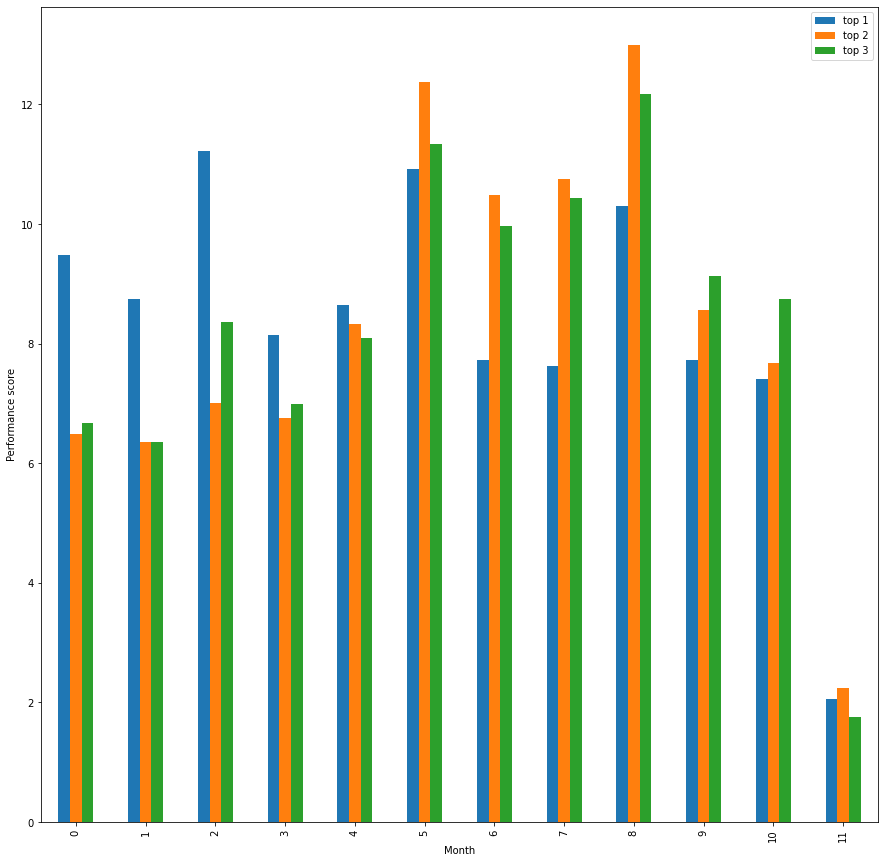

In [320]:
#plt.figure(figsize=(15,15))
db_res.plot(kind='bar',figsize=(15,15))
plt.xlabel('Month')
plt.ylabel('Performance score')

Top 2 has highest performance score in 8th month followed by month 5. 


### ** PART II**

In [321]:
#df_x=pd.read_csv(r'/gdrive/My Drive/Colab Notebooks/trends1.csv')
df_y=pd.read_csv(r'/gdrive/My Drive/Colab Notebooks/predictions.csv',parse_dates=['date'])


In [322]:
del df_y[df_y.columns[0]]
df_y.head(5)


,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650


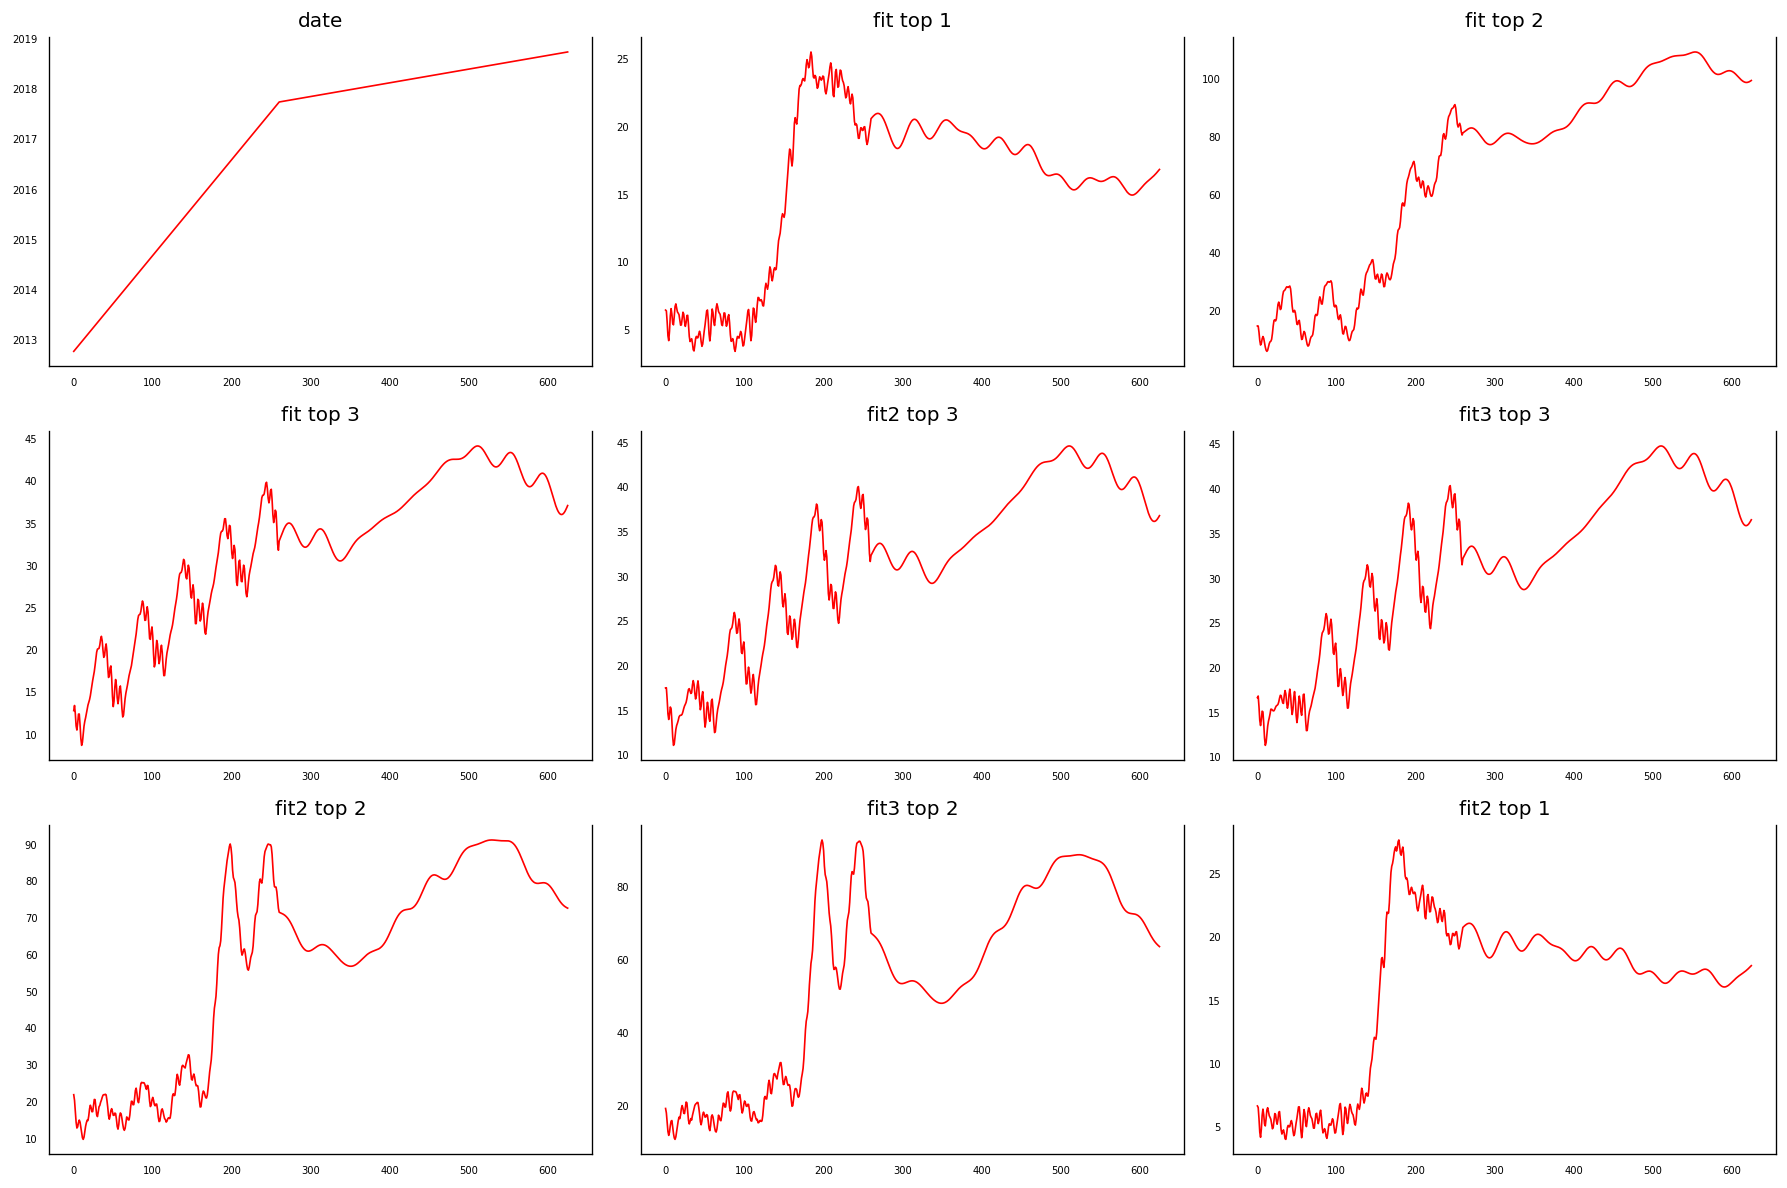

In [323]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(15,10))
for i, ax in enumerate(axes.flatten()):
    plot_data = df_y[df_y.columns[i]]
    ax.plot(plot_data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_y.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();





In [324]:
df_y.isnull().any()

date          False
fit top 1     False
fit top 2     False
fit top 3     False
fit2 top 3    False
fit3 top 3    False
fit2 top 2    False
fit3 top 2    False
fit2 top 1    False
fit3 top 1    False
dtype: bool

In [325]:
np.isfinite(df_y.all()) #and gets True

date          True
fit top 1     True
fit top 2     True
fit top 3     True
fit2 top 3    True
fit3 top 3    True
fit2 top 2    True
fit3 top 2    True
fit2 top 1    True
fit3 top 1    True
dtype: bool

In [326]:
df_y = df_y.replace([np.inf, -np.inf], np.nan)

In [327]:
df_y['date'] = pd.to_datetime(df_y.date) #, format = '%Y/%m/%d')

data = df_y.drop(['date'], axis=1)

data = df_y.set_index('date')


In [328]:
data = data.fillna(data.median()).astype(float)

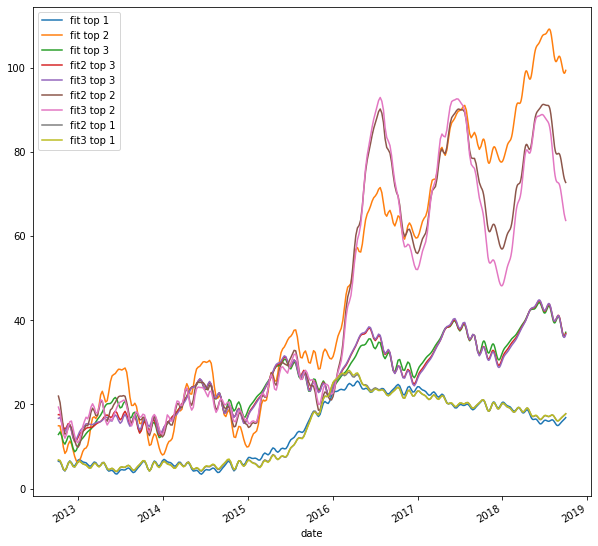

In [329]:
data.plot(figsize=(10,10))

In [330]:
#missing value treatment
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
       if data[j][i] == -200:
           data[j][i] = data[j][i-1]

#testing for stationary data


from statsmodels.tsa.stattools import adfuller
for cols in data.columns:
    test_result=adfuller(data[cols])
    print(test_result[1])

0.310128607965407
0.6177368497396615
0.16260159953822528
0.39459050994445594
0.35625520991833604
0.6096811326462405
0.5579768848271194
0.26241628271483564
0.26403175493690395


In [331]:

for cols in data.columns:
    test_result=adfuller(data[cols])
    data[cols] = data[cols] - data[cols].shift(1)
    print(data)


            fit top 1  fit top 2  fit top 3  fit2 top 3  fit3 top 3  \
date                                                                  
2012-10-07        NaN  14.918372  12.852700   17.560586   16.691433   
2012-10-14  -0.058976  14.879459  13.460605   17.584433   16.864402   
2012-10-21  -0.810164  12.766397  12.500809   16.287381   15.672930   
2012-10-28  -1.038763   9.883558  11.040882   14.667064   14.128378   
2012-11-04  -0.352925   8.345088  10.553082   14.029395   13.566908   
...               ...        ...        ...         ...         ...   
2018-09-27   0.064618  98.782168  36.344867   36.316258   36.037766   
2018-09-28   0.067037  98.884051  36.503322   36.415425   36.139121   
2018-09-29   0.068929  99.019655  36.689969   36.538825   36.265359   
2018-09-30   0.070070  99.184409  36.900044   36.682254   36.412168   
2018-10-01   0.070240  99.372937  37.128318   36.841104   36.574825   

            fit2 top 2  fit3 top 2  fit2 top 1  fit3 top 1  
date           

In [332]:

from statsmodels.tsa.stattools import adfuller
for cols in data.columns:
   diff_result=adfuller(data[cols].dropna())
   print(diff_result[1])

1.647599391922131e-05
2.2241379999592047e-13
8.949343475170841e-16
1.272876648050567e-16
9.872012460302118e-17
6.333966872338459e-11
7.373295001951017e-10
2.994090083827377e-06
1.6604121638703145e-06


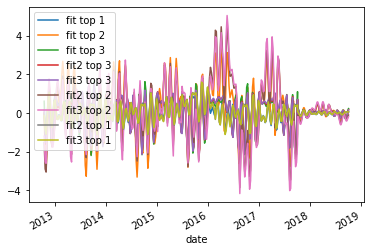

In [333]:
data.plot()

In [334]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.*(len(data))):]


model = VAR(endog=train.dropna())
model_fit = model.fit()
#model.summary()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


626

In [347]:
#converting predictions to dataframe
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

cols=data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,9):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
#print(pred)



In [ ]:
df[['sale','forecast']].plot(figsize=(12,8))

In [337]:
#make final predictions
model = VAR(endog=data.dropna())
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[ 0.00687066  0.12176291  0.13473524  0.07985936  0.08165633 -0.12862871
  -0.20332565  0.00161126  0.00204846]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [338]:
#Demand for next 3,6,12 months


In [339]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,4)]

In [340]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [341]:
future_df=pd.concat([data,future_datest_df])


In [342]:
#make final predictions
model = VAR(endog=future_df.fillna(0))
model_fit = model.fit()
yhat_3 = model_fit.forecast(model_fit.y, steps=1)
print("The future score for next 3 months are\n",yhat_3)

The future score for next 3 months are
 [[0.00164727 0.06033752 0.03006405 0.02716753 0.02744277 0.04927124
  0.0483984  0.00136003 0.00119213]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


# future 6 months dataset

In [343]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,7)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_df=pd.concat([data,future_datest_df])


In [344]:
#make final predictions
model = VAR(endog=future_df.fillna(0))
model_fit = model.fit()
yhat_6 = model_fit.forecast(model_fit.y, steps=1)
print("The future score for next 6 months are\n",yhat_6)


The future score for next 6 months are
 [[0.00163914 0.06003985 0.02991574 0.0270335  0.02730739 0.04902817
  0.04815964 0.00135332 0.00118625]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [345]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,13)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_df=pd.concat([data,future_datest_df])


In [346]:
#make final predictions
model = VAR(endog=future_df.fillna(0))
model_fit = model.fit()
yhat_12 = model_fit.forecast(model_fit.y, steps=1)
print("The future score for next 12 months are\n",yhat_12)

The future score for next 12 months are
 [[0.00162313 0.05945325 0.02962345 0.02676938 0.02704059 0.04854915
  0.04768911 0.0013401  0.00117466]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


### **Observation**

I have used VAR (vector Autoregression) as it works better for multivariate analysis.
